In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


In [11]:
total = {5: 27602836, 1: 7713520, 15: 6154120, 8: 4967559, 12: 4635589, 4: 4358631, 14: 3757567, 0: 3461800, 13: 3238468, 2: 2738659, 6: 2023743, 3: 1685475, 10: 560868, 7: 274134, 11: 164351, 9: 63000}
ll = []
for k in sorted(total):
    ll.append(total[k])


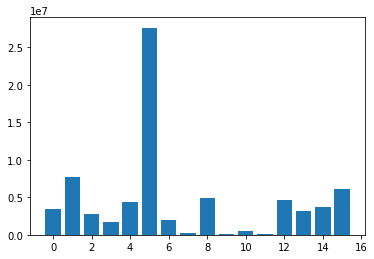

In [13]:
data = np.array(ll)
plt.bar(range(len(data)),data)
plt.show()

In [16]:
data

array([ 7789171, 20723104,  6729792,  4262723, 10744369, 72492029,
        4995403,   775212, 12008434,   269025,  1535180,   866954,
       10511899,  6562601,  8058336, 15176568])

In [21]:
max(data)

72492029

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

In [3]:
noise = np.load('noise.npy')
noise

array([[[ 0.11800416,  0.26509327,  0.80355585, ...,  0.45240098,
          1.8520267 ,  0.8745041 ],
        [ 0.33339152, -1.6735952 , -2.6022232 , ...,  1.0660529 ,
          2.0469103 , -0.95496756],
        [ 2.8860497 , -0.13005178, -0.9583726 , ...,  0.76987296,
         -0.42284986, -1.3368412 ],
        ...,
        [-1.522865  , -0.93375486,  0.47363284, ...,  1.6404704 ,
          0.18826859,  0.5500581 ],
        [ 0.23442084, -2.136849  , -0.735967  , ..., -0.61942345,
         -0.10090665,  1.1421773 ],
        [-0.61870956, -0.9521298 , -0.9841796 , ..., -0.2190126 ,
          0.7018203 ,  1.2344145 ]],

       [[ 1.0514189 ,  0.2638948 ,  1.075577  , ...,  1.89513   ,
         -0.5517163 , -0.85994446],
        [ 0.257362  ,  1.9203285 , -0.28283775, ...,  0.6489526 ,
          1.1033517 , -0.5573025 ],
        [ 1.2882035 , -1.2458797 , -1.0006264 , ..., -1.0727836 ,
         -2.1909218 , -0.30764386],
        ...,
        [-1.6908929 ,  0.5619576 , -0.9981083 , ..., -

In [12]:
noise[:,0,:10]

array([[ 0.11800416,  0.26509327,  0.80355585, -1.7540219 ,  2.107252  ,
        -0.44367698, -0.98498815, -0.70344996, -1.0195476 , -0.54538643],
       [ 1.0514189 ,  0.2638948 ,  1.075577  , -0.20957914,  0.28917402,
        -0.22283967, -1.1223941 ,  0.87810045, -0.36166874, -0.71442354],
       [-0.51933235,  0.22279151,  1.0467104 ,  1.2703027 ,  0.72628975,
        -0.01001961, -0.308336  ,  0.42128253, -0.7322681 , -1.5984967 ],
       [ 0.38930768,  0.8735909 ,  0.35359028,  0.4227721 , -0.38465965,
        -0.9160648 ,  0.2896787 ,  1.1749059 ,  0.2526169 ,  1.1798623 ]],
      dtype=float32)

In [5]:
import torch

/home/wcd/miniconda3/envs/wcd/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
tt= torch.randn(50,dtype=torch.float32)
tt

tensor([ 0.9734, -0.5127,  0.9208,  0.1523,  1.9440,  0.6560, -0.2314,  1.8970,
        -0.1164,  1.1527, -0.5012,  0.0058, -0.1113,  0.6823, -0.7413, -0.6447,
         0.0432,  0.6444,  0.6169,  1.1658, -0.2083,  0.1046, -2.2881,  1.3590,
        -0.8559,  2.1818, -0.3232,  0.8327, -0.7105, -0.9724,  0.1385,  0.4838,
        -0.4523, -0.0784,  0.4308, -0.3127, -1.3868, -0.2983,  0.2404,  0.3651,
        -0.4893,  0.1226, -0.2199, -0.8790,  0.9195,  1.6033,  0.2272,  0.8812,
        -2.3280, -0.4356])

In [10]:
words = ["industrial land", "urban residential","rural residential","traffic land","paddy field","irrigated land","dry cropland","garden plot"
            "arbor woodland","shrub land","natural grassland","artificial grassland","river","lake", "pond","unknown"]

In [6]:
embed = torch.load('embeddings.pt')

In [7]:
embed

torch.Size([16, 128, 4])

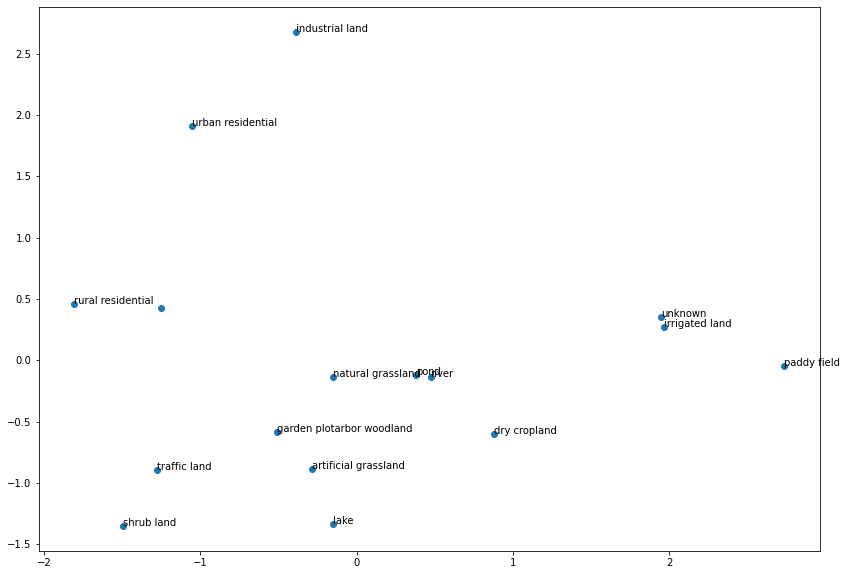

In [12]:

vector = embed[:,:,1].cpu().detach().numpy()
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

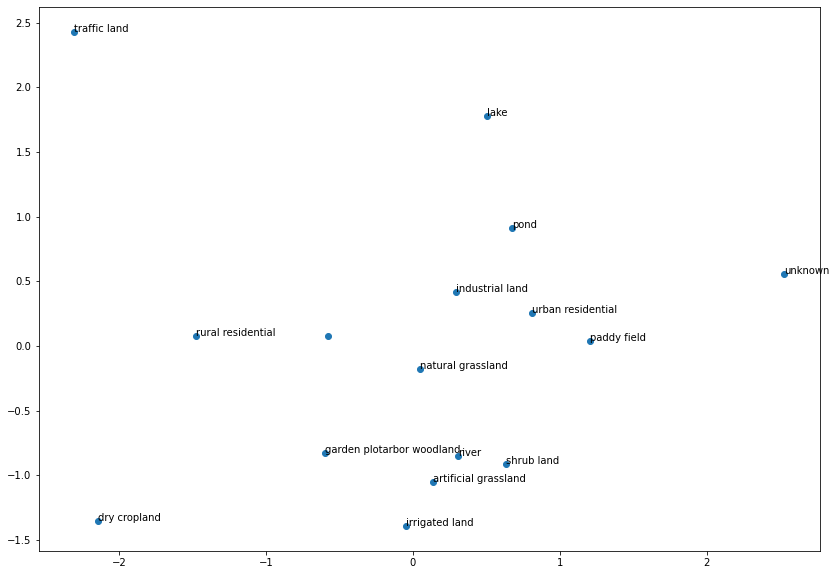

In [13]:

vector = embed[:,:,3].cpu().detach().numpy()
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

In [27]:

vector = embed[...,3]
tsne = TSNE(n_components=2,init='pca',verbose=1,learning_rate=200)
embedd = tsne.fit_transform(vector)
 


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.463516
[t-SNE] KL divergence after 1000 iterations: 0.356783


In [31]:
vector = embed[...,3]
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)

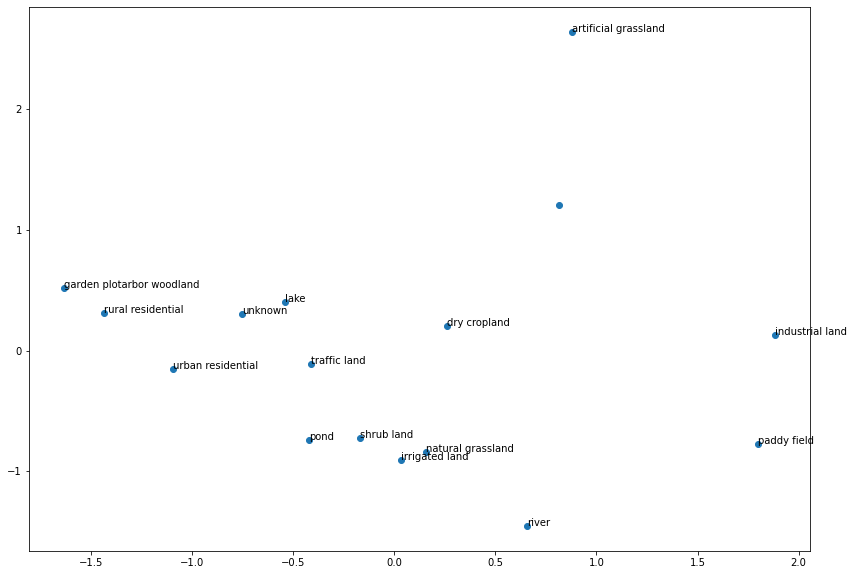

In [35]:
vector = embed[...,0]
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

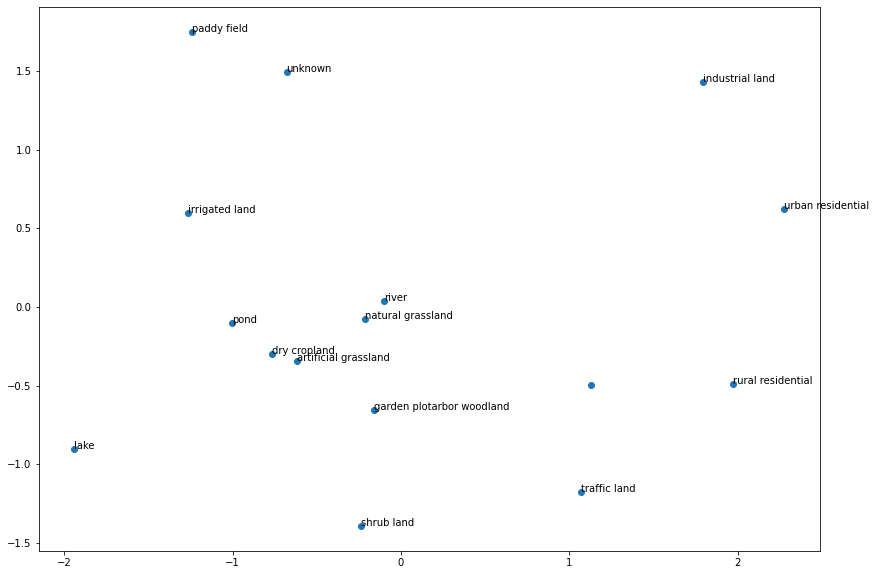

In [36]:
vector = embed[...,1]
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

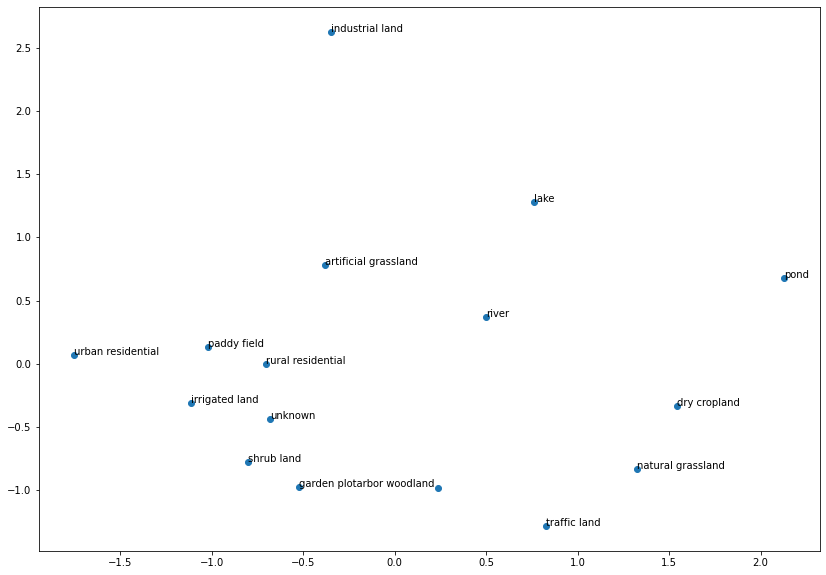

In [37]:
vector = embed[...,2]
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

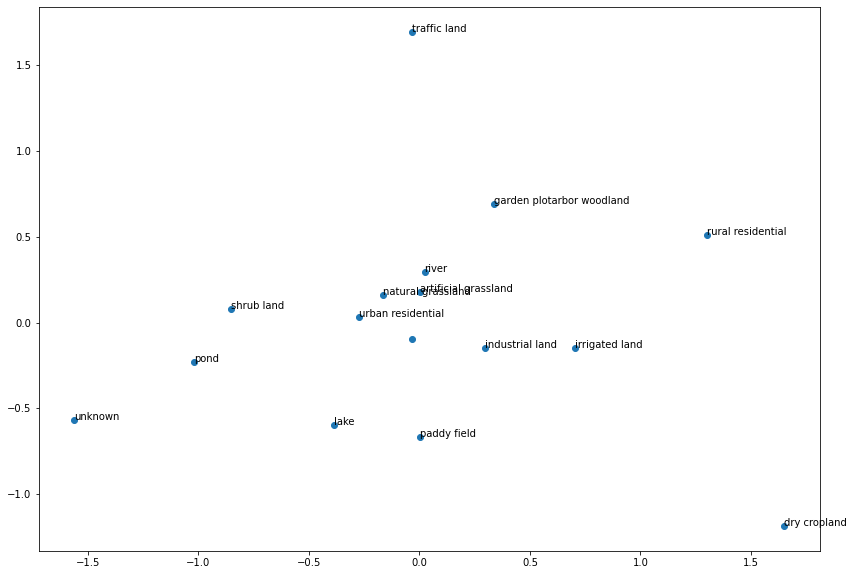

In [38]:
vector = embed[...,3]
pca=PCA(n_components=2)#n_components=1表示降成一维
embedd = pca.fit_transform(vector)
#可视化
plt.figure(figsize=(14,10))
plt.scatter(embedd[:,0], embedd[:,1])
 
for i in range(15):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])

plt.show()

In [49]:
from PIL import Image

In [51]:
im = Image.open('/home/wcd/datasets/GID/Fine_Land-cover_Classification_15classes/image_NirRGB/GF2_PMS1__L1A0001064454-MSS1.tif')

In [54]:
im.size

(7200, 6800)

In [55]:
arr = np.array(im)

In [56]:
arr.shape

(6800, 7200, 4)

In [57]:
rgb = Image.open('/home/wcd/datasets/GID/Fine_Land-cover_Classification_15classes/image_RGB/GF2_PMS1__L1A0001064454-MSS1.tif')

In [58]:
rgbarr = np.array(rgb)

In [59]:
np.sum(rgbarr != arr[...,1:])

0

In [60]:
arr[:10,:10,0]

array([[186, 183, 184, 190, 181, 181, 181, 186, 199, 202],
       [168, 179, 177, 181, 181, 186, 182, 184, 197, 202],
       [147, 160, 167, 171, 179, 191, 187, 184, 197, 202],
       [146, 142, 151, 166, 185, 204, 201, 188, 198, 204],
       [163, 151, 151, 159, 180, 206, 210, 188, 190, 199],
       [184, 172, 162, 155, 162, 191, 206, 182, 171, 184],
       [182, 177, 165, 155, 152, 173, 199, 179, 160, 168],
       [160, 168, 164, 158, 150, 162, 191, 181, 165, 166],
       [143, 156, 167, 170, 160, 162, 189, 187, 170, 162],
       [133, 145, 163, 177, 171, 165, 188, 190, 166, 153]], dtype=uint8)